# 1. LSTM

## Preprocessing

In [480]:
import pandas as pd
import numpy as np

In [481]:
df_g = pd.read_csv("Dataset C/GOOGL.csv")

In [482]:
df_g.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
1,2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2,2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
3,2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600


In [483]:
df_g.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [484]:
df_g.shape

(3932, 7)

In [485]:
df_i = pd.read_csv("Dataset C/INTC.csv")

In [486]:
df_i.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.325521,0.330729,0.325521,0.325521,0.204750,10924800
1,1980-03-18,0.325521,0.328125,0.322917,0.322917,0.203112,17068800
2,1980-03-19,0.330729,0.335938,0.330729,0.330729,0.208026,18508800
3,1980-03-20,0.330729,0.334635,0.329427,0.329427,0.207207,11174400
4,1980-03-21,0.322917,0.322917,0.317708,0.317708,0.199836,12172800


In [487]:
df_i.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [488]:
df_i.shape

(10098, 7)

In [489]:
df_g = pd.read_csv("Dataset C/GOOGL.csv", parse_dates=['Date'], index_col=['Date'])
df_i = pd.read_csv("Dataset C/INTC.csv", parse_dates=['Date'], index_col=['Date'])

In [490]:
df_g.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600


In [491]:
df_i.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-03-17,0.325521,0.330729,0.325521,0.325521,0.204750,10924800
1980-03-18,0.325521,0.328125,0.322917,0.322917,0.203112,17068800
1980-03-19,0.330729,0.335938,0.330729,0.330729,0.208026,18508800
1980-03-20,0.330729,0.334635,0.329427,0.329427,0.207207,11174400
1980-03-21,0.322917,0.322917,0.317708,0.317708,0.199836,12172800


In [492]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3932 entries, 2004-08-19 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3932 non-null   float64
 1   High       3932 non-null   float64
 2   Low        3932 non-null   float64
 3   Close      3932 non-null   float64
 4   Adj Close  3932 non-null   float64
 5   Volume     3932 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 215.0 KB


In [493]:
df_g.shape

(3932, 6)

In [494]:
df_i.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10098 entries, 1980-03-17 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10098 non-null  float64
 1   High       10098 non-null  float64
 2   Low        10098 non-null  float64
 3   Close      10098 non-null  float64
 4   Adj Close  10098 non-null  float64
 5   Volume     10098 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 552.2 KB


In [495]:
df_i.shape

(10098, 6)

<Axes: xlabel='Date'>

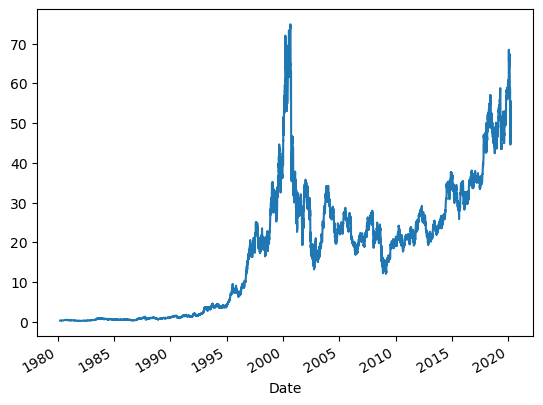

In [496]:
temp = df_i['Close']
temp.plot()

<Axes: xlabel='Date'>

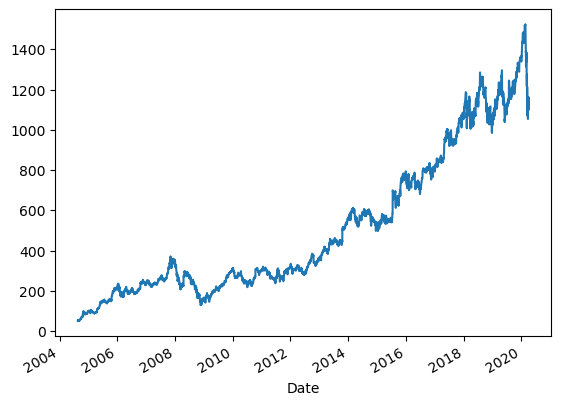

In [497]:
temp = df_g['Close']
temp.plot()

In [498]:
dfgoog = pd.DataFrame(df_g['Close'])
dfint = pd.DataFrame(df_i['Close'])

In [499]:
dfgoog

,Close
Date,
2004-08-19,50.220219
2004-08-20,54.209209
2004-08-23,54.754753
2004-08-24,52.487488
2004-08-25,53.053055
...,...
2020-03-26,1162.920044
2020-03-27,1110.260010
2020-03-30,1146.310059


In [500]:
dfint

,Close
Date,
1980-03-17,0.325521
1980-03-18,0.322917
1980-03-19,0.330729
1980-03-20,0.329427
1980-03-21,0.317708
...,...
2020-03-26,55.540001
2020-03-27,52.369999
2020-03-30,55.490002


In [501]:
import datetime
def str_to_datetime(s):
    return datetime.datetime.strptime(s, "%Y-%m-%d")

In [ ]:
[[1] [2] [3] [4] [5]] [6]
[[2] [3] [4] [5] [6]] [7]
[[3] [4] [5] [6] [7]] [8]

In [502]:
def window(dataframe, first_datestr, last_datestr, n):
    first_date = str_to_datetime(first_datestr)
    last_date = str_to_datetime(last_datestr)

    target_date = first_date

    dates = []
    X, Y = [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n + 1)

        if len(df_subset) != n + 1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        next_week = dataframe.loc[target_date:target_date + datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index[0])
        next_date = datetime.datetime.strptime(next_datetime_str.split(' ')[0], '%Y-%m-%d')

        if last_time:
            break

        target_date = next_date

        if target_date == last_date:
            last_time = True

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X = np.array(X)
    for i in range(n):
        ret_df[f'Target-{i}'] = X[:, i]

    ret_df['Target'] = Y

    return ret_df

## GOOGL LSTM

In [503]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
dfgoog['Close'] = scaler.fit_transform(dfgoog['Close'].values.reshape(-1,1))

In [542]:
windowed_goog = window(dfgoog,"2004-08-26","2020-04-01",5)
windowed_goog

,Target Date,Target-0,Target-1,Target-2,Target-3,Target-4,Target
0,2004-08-26,0.000112,0.002817,0.003187,0.001649,0.002033,0.002681
1,2004-08-27,0.002817,0.003187,0.001649,0.002033,0.002681,0.002084
2,2004-08-30,0.003187,0.001649,0.002033,0.002681,0.002084,0.000679
3,2004-08-31,0.001649,0.002033,0.002681,0.002084,0.000679,0.000801
4,2004-09-01,0.002033,0.002681,0.002084,0.000679,0.000801,0.000081
...,...,...,...,...,...,...,...
3922,2020-03-26,0.719829,0.690361,0.680814,0.732265,0.713015,0.754579
3923,2020-03-27,0.690361,0.680814,0.732265,0.713015,0.754579,0.718873
3924,2020-03-30,0.680814,0.732265,0.713015,0.754579,0.718873,0.743317
3925,2020-03-31,0.732265,0.713015,0.754579,0.718873,0.743317,0.753922


In [505]:
def getXY(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:,0]

    middle_matrix = df_as_np[:, 1:-1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
    Y = df_as_np[:,-1]

    return dates, X.astype(np.float32), Y.astype(np.float32)

In [543]:
dates, X, y = getXY(windowed_goog)
dates.shape, X.shape, y.shape

((3927,), (3927, 5, 1), (3927,))

In [507]:
dates

array([Timestamp('2004-08-26 00:00:00'), Timestamp('2004-08-27 00:00:00'),
       Timestamp('2004-08-30 00:00:00'), ...,
       Timestamp('2020-03-30 00:00:00'), Timestamp('2020-03-31 00:00:00'),
       Timestamp('2020-04-01 00:00:00')], dtype=object)

In [544]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

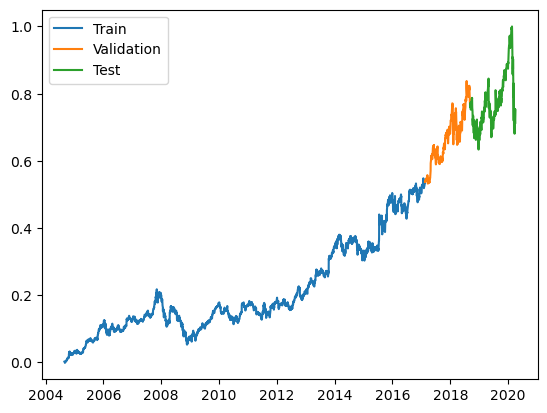

In [509]:
import matplotlib.pyplot as plt
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.legend(["Train", "Validation", "Test"])

In [510]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping

## Base Model

In [545]:
modelbase = Sequential()
modelbase.add(Input((5,1)))
modelbase.add(LSTM(units=50, activation='relu', return_sequences=False))
modelbase.add(Dense(1))
modelbase.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
modelbase.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 100)

Epoch 1/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0212 - mean_absolute_error: 0.1063 - val_loss: 5.4133e-04 - val_mean_absolute_error: 0.0180
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.5350e-05 - mean_absolute_error: 0.0060 - val_loss: 3.5890e-04 - val_mean_absolute_error: 0.0156
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6602e-05 - mean_absolute_error: 0.0048 - val_loss: 2.8198e-04 - val_mean_absolute_error: 0.0131
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6047e-05 - mean_absolute_error: 0.0047 - val_loss: 3.4638e-04 - val_mean_absolute_error: 0.0152
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6767e-05 - mean_absolute_error: 0.0047 - val_loss: 2.4577e-04 - val_mean_absolute_error: 0.0116
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.1165e-05 - mean_absolute_error: 0.0045 - val_loss: 2.6232e-04 - val_mean_absolute_error: 0.0124
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.9

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


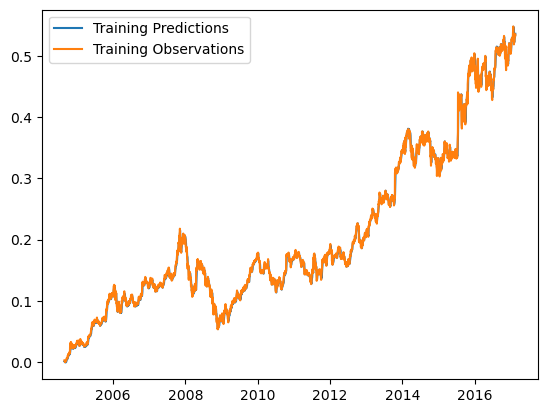

In [546]:
train_pred = modelbase.predict(X_train).flatten()

plt.plot(dates_train, train_pred)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step


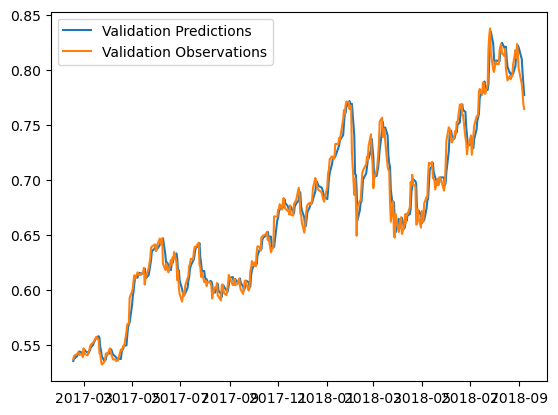

In [547]:
val_pred = modelbase.predict(X_val).flatten()

plt.plot(dates_val, val_pred)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step


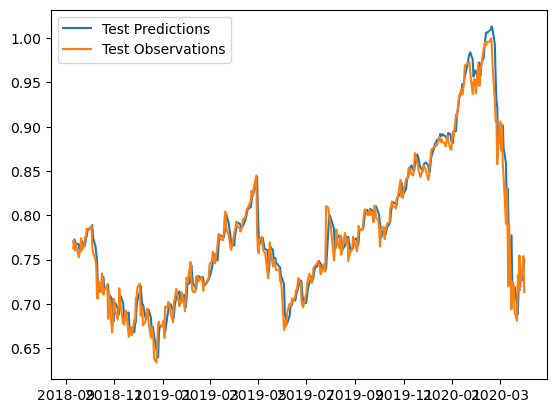

In [548]:
test_pred = modelbase.predict(X_test).flatten()

plt.plot(dates_test, test_pred)
plt.plot(dates_test, y_test)
plt.legend(['Test Predictions', 'Test Observations'])

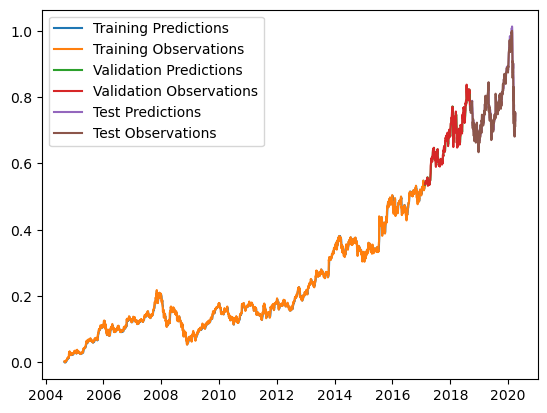

In [549]:
plt.plot(dates_train, train_pred)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_pred)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_pred)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 'Training Observations',
            'Validation Predictions', 'Validation Observations',
            'Test Predictions', 'Test Observations'])

## Modified Model

In [556]:
model3 = Sequential([layers.Input((5,1)),
                    layers.LSTM(128),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(1)])
model3.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])
early_stopping = EarlyStopping(monitor='val_mean_absolute_error', patience=10, restore_best_weights=True)
model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 100 , callbacks=early_stopping)

Epoch 1/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0095 - mean_absolute_error: 0.0581 - val_loss: 3.1000e-04 - val_mean_absolute_error: 0.0124
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2748e-05 - mean_absolute_error: 0.0046 - val_loss: 2.7413e-04 - val_mean_absolute_error: 0.0117
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3642e-05 - mean_absolute_error: 0.0046 - val_loss: 2.6911e-04 - val_mean_absolute_error: 0.0116
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6000e-05 - mean_absolute_error: 0.0047 - val_loss: 2.3196e-04 - val_mean_absolute_error: 0.0112
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5567e-05 - mean_absolute_error: 0.0046 - val_loss: 2.3260e-04 - val_mean_absolute_error: 0.0110
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1561e-05 - mean_absolute_error: 0.0046 - val_loss: 2.5068e-04 - val_mean_absolute_error: 0.0112
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


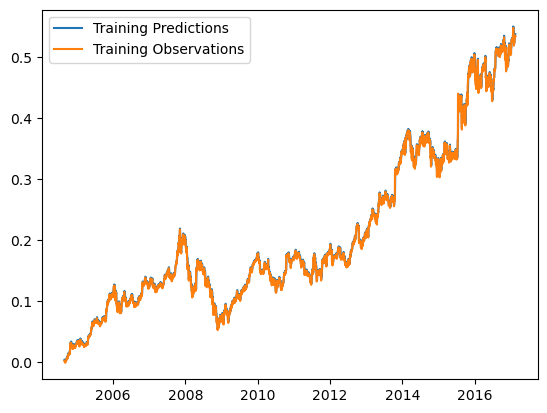

In [557]:
train3_pred = model3.predict(X_train).flatten()

plt.plot(dates_train, train3_pred)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step


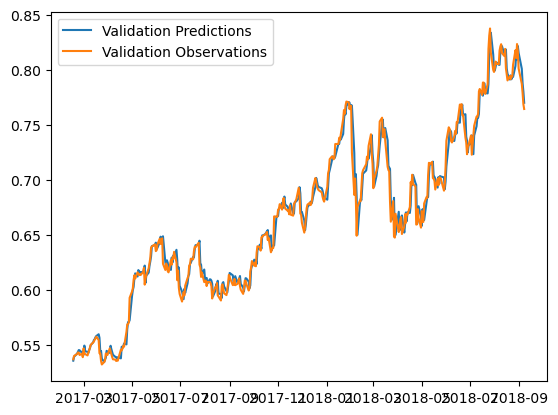

In [558]:
val3_pred = model3.predict(X_val).flatten()

plt.plot(dates_val, val3_pred)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step


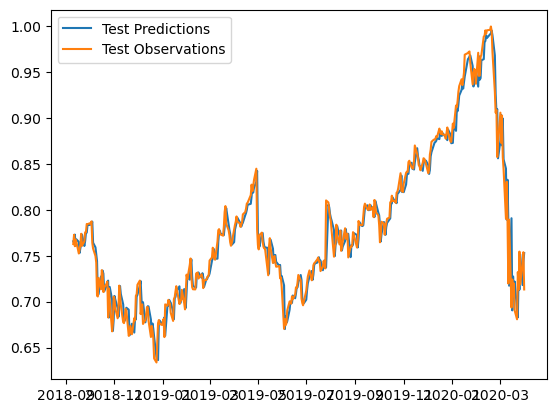

In [559]:
test3_pred = model3.predict(X_test).flatten()

plt.plot(dates_test, test3_pred)
plt.plot(dates_test, y_test)
plt.legend(['Test Predictions', 'Test Observations'])

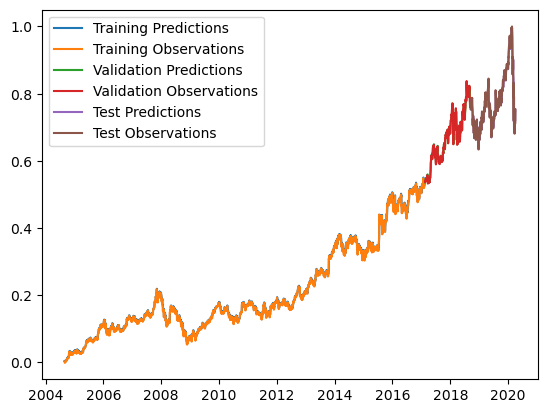

In [560]:
plt.plot(dates_train, train3_pred)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val3_pred)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test3_pred)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 'Training Observations',
            'Validation Predictions', 'Validation Observations',
            'Test Predictions', 'Test Observations'])

## RMSE, MAE, MAPE Evaluation

In [521]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [522]:
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, mape

In [561]:
rmse_base, mae_base, mape_base = calculate_metrics(y_test, test_pred)
rmse_opt, mae_opt, mape_opt = calculate_metrics(y_test, test3_pred)

In [562]:
print(f'Base Model - RMSE: {rmse_base}, MAE: {mae_base}, MAPE: {mape_base}')
print(f'Modified Model - RMSE: {rmse_opt}, MAE: {mae_opt}, MAPE: {mape_opt}')

Base Model - RMSE: 0.016850896179676056, MAE: 0.011358620598912239, MAPE: 1.4774334616959095
Modified Model - RMSE: 0.0164326224476099, MAE: 0.010888946242630482, MAPE: 1.420182641595602


In [563]:
improvement_rmse = ((rmse_base - rmse_opt) / rmse_base) * 100
improvement_mae = ((mae_base - mae_opt) / mae_base) * 100
improvement_mape = ((mape_base - mape_opt) / mape_base) * 100

print(f'Improvement RMSE: {improvement_rmse:.2f}%')
print(f'Improvement MAE: {improvement_mae:.2f}%')
print(f'Improvement MAPE: {improvement_mape:.2f}%')


Improvement RMSE: 2.48%
Improvement MAE: 4.13%
Improvement MAPE: 3.88%


## INTC LSTM

In [565]:
scaler = MinMaxScaler(feature_range=(0,1))
dfint['Close'] = scaler.fit_transform(dfint['Close'].values.reshape(-1,1))

In [566]:
windowed_intc = window(dfint,"1980-03-24","2020-04-01",5)
windowed_intc

,Target Date,Target-0,Target-1,Target-2,Target-3,Target-4,Target
0,1980-03-24,0.001465,0.001430,0.001535,0.001517,0.001360,0.001273
1,1980-03-25,0.001430,0.001535,0.001517,0.001360,0.001273,0.001291
2,1980-03-26,0.001535,0.001517,0.001360,0.001273,0.001291,0.001256
3,1980-03-27,0.001517,0.001360,0.001273,0.001291,0.001256,0.001116
4,1980-03-28,0.001360,0.001273,0.001291,0.001256,0.001116,0.001273
...,...,...,...,...,...,...,...
10088,2020-03-26,0.612437,0.610964,0.661192,0.698964,0.683695,0.741022
10089,2020-03-27,0.610964,0.661192,0.698964,0.683695,0.741022,0.698562
10090,2020-03-30,0.661192,0.698964,0.683695,0.741022,0.698562,0.740352
10091,2020-03-31,0.698964,0.683695,0.741022,0.698562,0.740352,0.722002


In [567]:
dates, X, y = getXY(windowed_intc)
dates.shape, X.shape, y.shape

((10093,), (10093, 5, 1), (10093,))

In [568]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

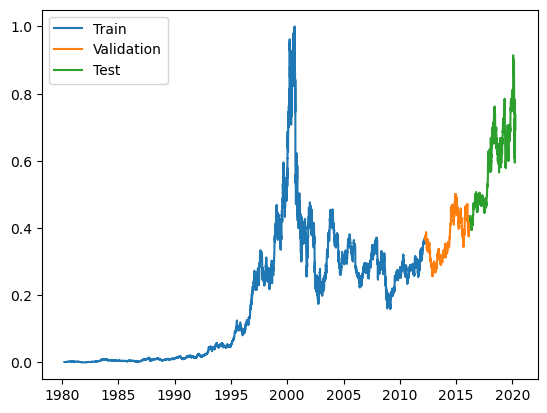

In [569]:
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)
plt.legend(["Train", "Validation", "Test"])

## Base Model

In [570]:
modelbase = Sequential()
modelbase.add(Input((5,1)))
modelbase.add(LSTM(units=50, activation='relu', return_sequences=False))
modelbase.add(Dense(1))
modelbase.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
modelbase.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 100)

Epoch 1/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0137 - mean_absolute_error: 0.0652 - val_loss: 1.1034e-04 - val_mean_absolute_error: 0.0080
Epoch 2/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 1.2074e-04 - mean_absolute_error: 0.0059 - val_loss: 7.3789e-05 - val_mean_absolute_error: 0.0065
Epoch 3/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 1.5278e-04 - mean_absolute_error: 0.0068 - val_loss: 9.3386e-05 - val_mean_absolute_error: 0.0077
Epoch 4/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 1.2141e-04 - mean_absolute_error: 0.0064 - val_loss: 8.4922e-05 - val_mean_absolute_error: 0.0073
Epoch 5/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 1.4344e-04 - mean_absolute_error: 0.0069 - val_loss: 9.6112e-05 - val_mean_absolute_error: 0.0077
Epoch 6/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: 1.3348e-04 - mean_absolute_error: 0.0067 - val_loss: 6.9268e-05 - val_mean_absolute_error: 0.0064
Epoch 7/100
253/253 ━━━━━━━━━━━━━━━━━━━━

253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step


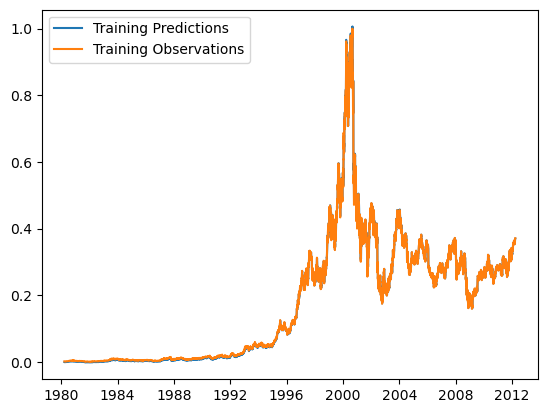

In [571]:
train_pred = modelbase.predict(X_train).flatten()

plt.plot(dates_train, train_pred)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step


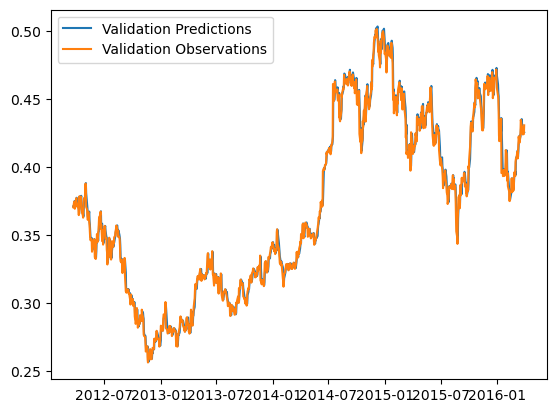

In [572]:
val_pred = modelbase.predict(X_val).flatten()

plt.plot(dates_val, val_pred)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step


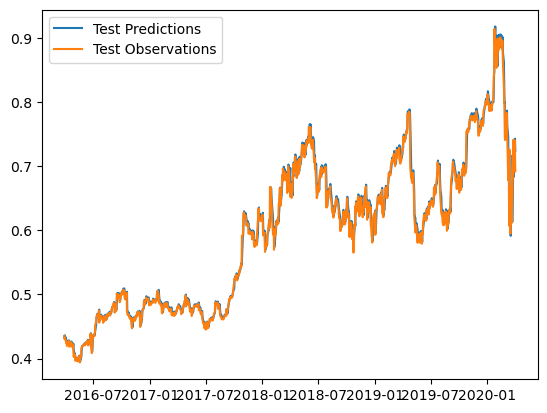

In [573]:
test_pred = modelbase.predict(X_test).flatten()

plt.plot(dates_test, test_pred)
plt.plot(dates_test, y_test)
plt.legend(['Test Predictions', 'Test Observations'])

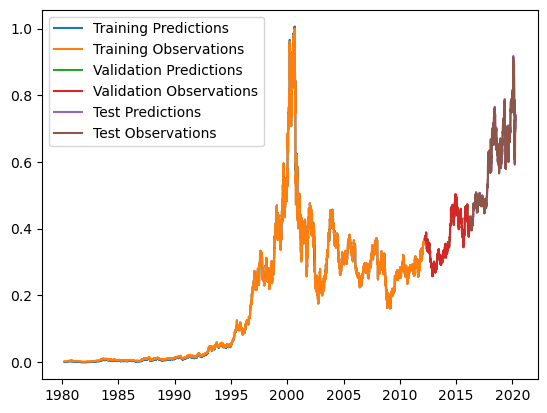

In [574]:
plt.plot(dates_train, train_pred)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_pred)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_pred)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 'Training Observations',
            'Validation Predictions', 'Validation Observations',
            'Test Predictions', 'Test Observations'])

## Modified Model

In [575]:
model3 = Sequential([layers.Input((5,1)),
                    layers.LSTM(128),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(1)])
model3.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])
early_stopping = EarlyStopping(monitor='val_mean_absolute_error', patience=10, restore_best_weights=True)
model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 100 , callbacks=early_stopping)

Epoch 1/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0084 - mean_absolute_error: 0.0400 - val_loss: 6.9615e-05 - val_mean_absolute_error: 0.0062
Epoch 2/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4915e-04 - mean_absolute_error: 0.0072 - val_loss: 6.6393e-05 - val_mean_absolute_error: 0.0062
Epoch 3/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4913e-04 - mean_absolute_error: 0.0070 - val_loss: 1.1414e-04 - val_mean_absolute_error: 0.0088
Epoch 4/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2968e-04 - mean_absolute_error: 0.0065 - val_loss: 8.6740e-05 - val_mean_absolute_error: 0.0075
Epoch 5/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3145e-04 - mean_absolute_error: 0.0065 - val_loss: 1.4730e-04 - val_mean_absolute_error: 0.0097
Epoch 6/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1952e-04 - mean_absolute_error: 0.0067 - val_loss: 3.1803e-04 - val_mean_absolute_error: 0.0164
Epoch 7/100
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


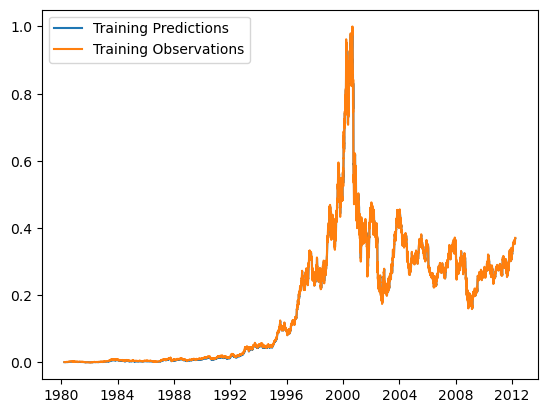

In [576]:
train3_pred = model3.predict(X_train).flatten()

plt.plot(dates_train, train3_pred)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step


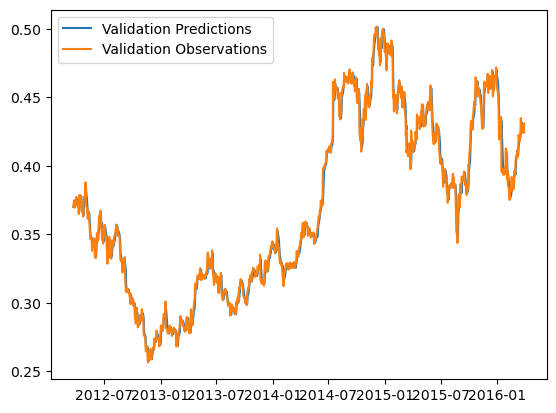

In [577]:
val3_pred = model3.predict(X_val).flatten()

plt.plot(dates_val, val3_pred)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step


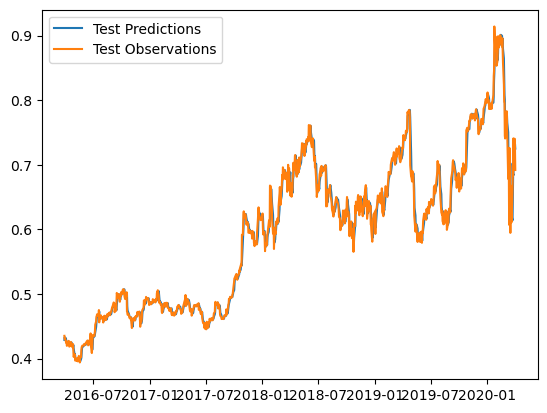

In [578]:
test3_pred = model3.predict(X_test).flatten()

plt.plot(dates_test, test3_pred)
plt.plot(dates_test, y_test)
plt.legend(['Test Predictions', 'Test Observations'])

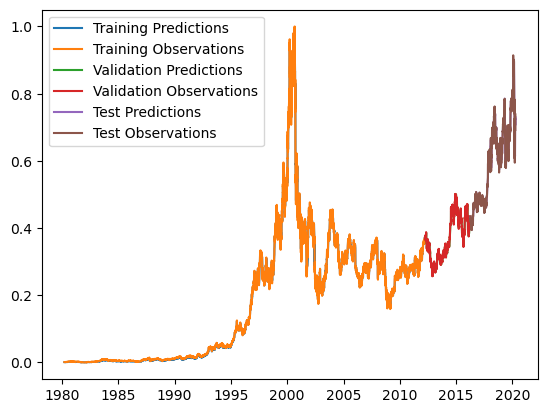

In [579]:
plt.plot(dates_train, train3_pred)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val3_pred)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test3_pred)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 'Training Observations',
            'Validation Predictions', 'Validation Observations',
            'Test Predictions', 'Test Observations'])

In [580]:
rmse_base, mae_base, mape_base = calculate_metrics(y_test, test_pred)
rmse_opt, mae_opt, mape_opt = calculate_metrics(y_test, test3_pred)
improvement_rmse = ((rmse_base - rmse_opt) / rmse_base) * 100
improvement_mae = ((mae_base - mae_opt) / mae_base) * 100
improvement_mape = ((mape_base - mape_opt) / mape_base) * 100
print(f'Base Model - RMSE: {rmse_base}, MAE: {mae_base}, MAPE: {mape_base}')
print(f'Modified Model - RMSE: {rmse_opt}, MAE: {mae_opt}, MAPE: {mape_opt}')
print(f'Improvement RMSE: {improvement_rmse:.2f}%')
print(f'Improvement MAE: {improvement_mae:.2f}%')
print(f'Improvement MAPE: {improvement_mape:.2f}%')

Base Model - RMSE: 0.013601954095065594, MAE: 0.008153075352311134, MAPE: 1.3119694776833057
Modified Model - RMSE: 0.013043520040810108, MAE: 0.008025477640330791, MAPE: 1.2942193076014519
Improvement RMSE: 4.11%
Improvement MAE: 1.57%
Improvement MAPE: 1.35%
